In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data_path = './data/smartwatches.csv'
df = pd.read_csv(data_path)
df.drop_duplicates(inplace=True)
# train_df = df.sample(frac=0.8, random_state=42)
# test_df = df.drop(train_df.index)
# train_df = train_df.reset_index()
# test_df = test_df.reset_index()

In [7]:
train_df = df.copy()

In [4]:
df.shape, train_df.shape

((450, 16), (450, 16))

In [8]:
train_df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [6]:
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [8]:
train_df['Display Size'].isna().sum()

30

In [9]:
train_df['Display Size'].value_counts().count()

40

In [10]:
train_df['Display Size'].fillna('0.0 inches', inplace=True)

In [11]:
train_df['Display Size'].isna().sum()

0

In [12]:
train_df['Display Size'] = train_df['Display Size'].apply(lambda x: float(x.split()[0]))

In [13]:
train_df['Display Size'].head()

0    0.0
1    1.8
2    1.7
3    1.8
4    1.7
Name: Display Size, dtype: float64

In [14]:
train_df['Display Size'].replace(0.0, np.nan, inplace=True)

In [15]:
train_df['Display Size'].isna().sum()

31

In [16]:
train_df['Weight'].value_counts()

20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: Weight, dtype: int64

In [17]:
re.findall('\d+', '20 - 35 g ')

['20', '35']

In [18]:
cal = sum([int(x) for x in re.findall('\d+', '20 - 35 g ')]) / 2
train_df['Weight'].replace('20 - 35 g', cal, inplace=True)

In [19]:
cal = sum([int(x) for x in re.findall('\d+', '35 - 50 g')]) / 2
train_df['Weight'].replace('35 - 50 g', cal, inplace=True)

In [20]:
cal = sum([int(x) for x in re.findall('\d+', '50 - 75 g')]) / 2
train_df['Weight'].replace('50 - 75 g', cal, inplace=True)

In [21]:
train_df['Weight'].replace('75g +', float(re.findall('\d+', '75g +')[0]), inplace=True)

In [22]:
train_df['Weight'].replace('<= 20 g', float(re.findall('\d+', '<= 20 g')[0]), inplace=True)

In [23]:
train_df['Weight'].value_counts()

27.5    80
75.0    66
42.5    58
20.0    43
62.5    17
Name: Weight, dtype: int64

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                450 non-null    object 
 1   Current Price        440 non-null    float64
 2   Original Price       377 non-null    float64
 3   Discount Percentage  377 non-null    float64
 4   Rating               444 non-null    float64
 5   Number OF Ratings    391 non-null    float64
 6   Model Name           415 non-null    object 
 7   Dial Shape           327 non-null    object 
 8   Strap Color          327 non-null    object 
 9   Strap Material       381 non-null    object 
 10  Touchscreen          413 non-null    object 
 11  Battery Life (Days)  418 non-null    float64
 12  Bluetooth            444 non-null    object 
 13  Display Size         419 non-null    float64
 14  Weight               264 non-null    float64
dtypes: float64(8), object(7)
memory usage: 5

In [25]:
train_df.head()

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,42.5
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,62.5
2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7,42.5
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8,75.0
4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7,42.5


In [26]:
train_df['Discount Price'] = (train_df['Original Price'] * (-train_df['Discount Percentage'])) / 100

In [27]:
train_df.drop(['Discount Percentage'], axis=1, inplace=True)

#### Numerical Data

In [28]:
numerical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'float64']

In [29]:
numerical_col

['Current Price',
 'Original Price',
 'Rating',
 'Number OF Ratings',
 'Battery Life (Days)',
 'Display Size',
 'Weight',
 'Discount Price']

In [30]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,82990.0,89900.0,4.0,65.0,8.0,NaN,42.5,-6910.000000
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000


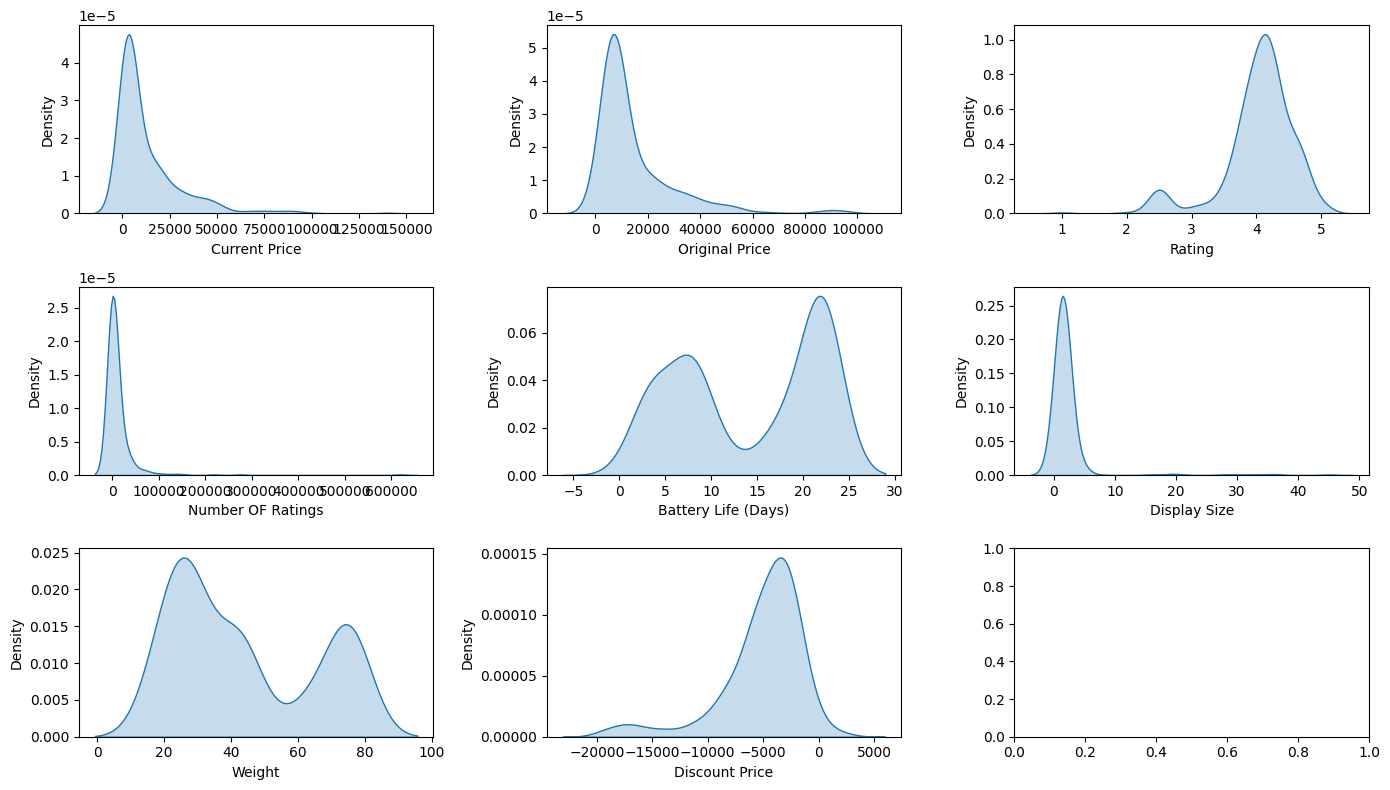

In [31]:
fig , axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))

for i , colum in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data=train_df[colum], ax=ax, fill=True)

fig.tight_layout()
plt.show()

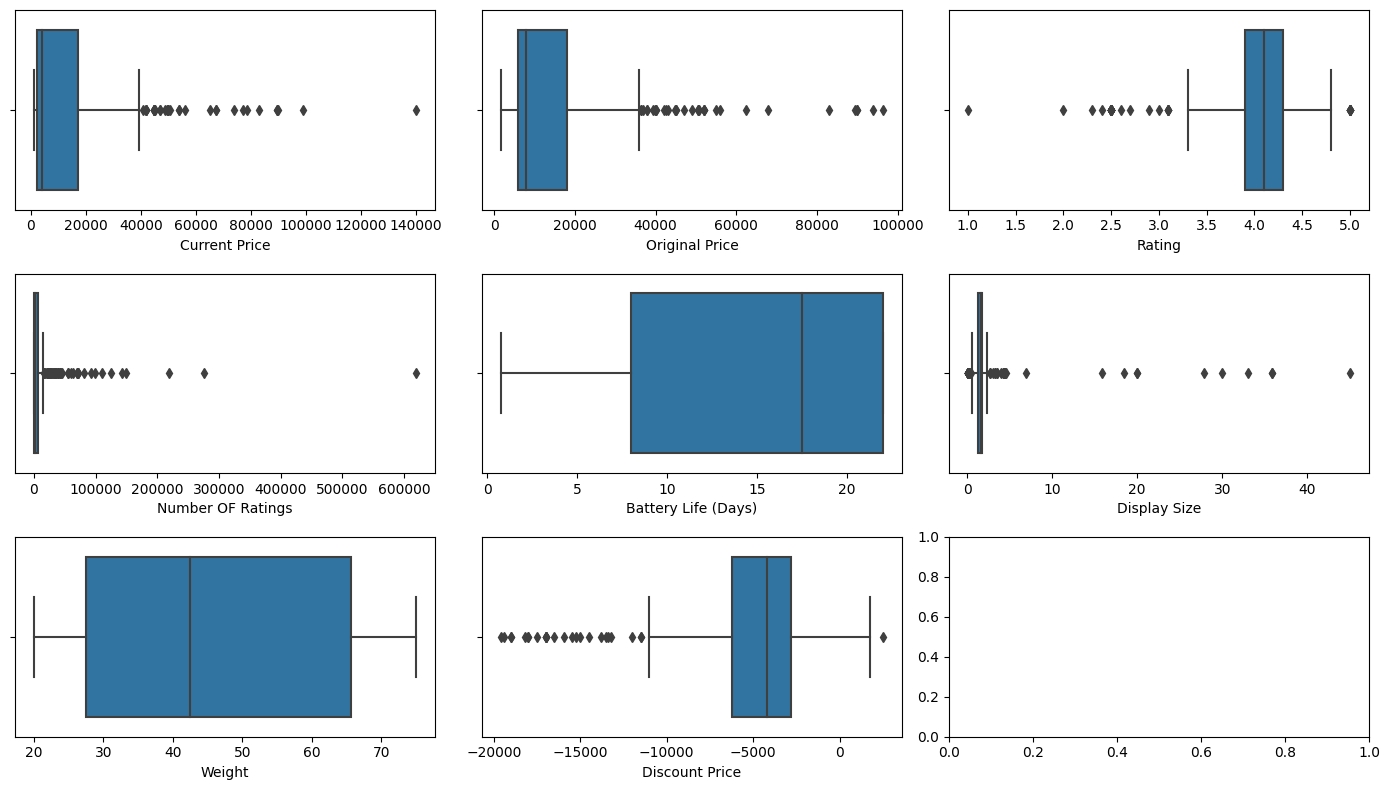

In [32]:
fig , axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 8))

for i , colum in enumerate(numerical_col):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=train_df[colum], ax=ax)

fig.tight_layout()
plt.show()

In [33]:
def remove_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col] < upper_bound)]

In [34]:
train_df.columns

Index(['Brand', 'Current Price', 'Original Price', 'Rating',
       'Number OF Ratings', 'Model Name', 'Dial Shape', 'Strap Color',
       'Strap Material', 'Touchscreen', 'Battery Life (Days)', 'Bluetooth',
       'Display Size', 'Weight', 'Discount Price'],
      dtype='object')

In [35]:
train_df.shape

(450, 15)

In [36]:
import_col = ['Current Price', 'Original Price', 'Rating', 'Number OF Ratings', 'Display Size']

In [37]:
for col in import_col:
    train_df = remove_outliers_IQR(train_df, col)

In [38]:
for col in numerical_col:
    train_df[col].fillna(train_df[col].median(), inplace=True)

Current Price
Original Price
Rating
Number OF Ratings
Battery Life (Days)
Display Size
Weight
Discount Price


In [39]:
train_df.shape

(181, 15)

In [40]:
train_df.isna().sum()

Brand                   0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Battery Life (Days)     0
Bluetooth               0
Display Size            0
Weight                  0
Discount Price          0
dtype: int64

In [41]:
train_df[numerical_col].head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
1,3799.0,16999.0,4.3,20788.0,3.5,1.8,62.5,-13200.000001
2,1999.0,7990.0,3.8,21724.0,8.0,1.7,42.5,-5991.000000
3,1799.0,19999.0,4.3,13244.0,3.5,1.8,75.0,-18200.000000
4,1599.0,4999.0,4.1,13901.0,8.0,1.7,42.5,-3400.000000
5,1499.0,3999.0,4.0,32704.0,8.0,1.7,42.5,-2500.000000


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
data = scaler.fit_transform(train_df[numerical_col[:-1]])

In [45]:
data

array([[0.1116311 , 0.56836451, 0.83333333, ..., 0.12941176, 0.61538462,
        0.77272727],
       [0.03434803, 0.22996018, 0.41666667, ..., 0.34117647, 0.53846154,
        0.40909091],
       [0.02576102, 0.68105326, 0.83333333, ..., 0.12941176, 0.61538462,
        1.        ],
       ...,
       [0.02996866, 0.00116445, 0.        , ..., 1.        , 1.        ,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091],
       [0.12021811, 0.30542409, 0.33333333, ..., 1.        , 0.53846154,
        0.40909091]])

In [46]:
data = pd.DataFrame(data, columns=numerical_col[:-1])

In [47]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [48]:
data.shape, train_df.shape

((181, 7), (181, 15))

In [49]:
data.isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
dtype: int64

In [50]:
train_df.drop(numerical_col[:-1], axis=1, inplace=True)

In [51]:
train_df.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price
1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes,-13200.000001
2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,-5991.000000
3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes,-18200.000000
4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,-3400.000000
5,noise,NSW-05,NaN,NaN,Other,Yes,Yes,-2500.000000


In [52]:
train_df.isna().sum()

Brand              0
Model Name         9
Dial Shape        65
Strap Color       65
Strap Material    26
Touchscreen        6
Bluetooth          0
Discount Price     0
dtype: int64

In [53]:
train_df.shape, data.shape

((181, 8), (181, 7))

In [54]:
data.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [55]:
pd.concat([train_df.reset_index(), data], axis=1).shape

(181, 16)

In [56]:
train_df = pd.concat([train_df.reset_index(), data], axis=1)

In [57]:
train_df.isna().sum()

index                   0
Brand                   0
Model Name              9
Dial Shape             65
Strap Color            65
Strap Material         26
Touchscreen             6
Bluetooth               0
Discount Price          0
Current Price           0
Original Price          0
Rating                  0
Number OF Ratings       0
Battery Life (Days)     0
Display Size            0
Weight                  0
dtype: int64

In [58]:
train_df.head()

,index,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Discount Price,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight
0,1,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes,-13200.000001,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727
1,2,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes,-5991.000000,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091
2,3,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes,-18200.000000,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000
3,4,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes,-3400.000000,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091
4,5,noise,NSW-05,NaN,NaN,Other,Yes,Yes,-2500.000000,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091


In [59]:
train_df[numerical_col]

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000
...,...,...,...,...,...,...,...,...
176,0.184621,0.211517,0.500000,0.000569,1.000000,0.615385,0.409091,-2000.000000
177,0.068696,0.136391,0.500000,0.000569,1.000000,0.538462,0.409091,-2700.000000
178,0.029969,0.001164,0.000000,0.000030,1.000000,1.000000,0.409091,-2.000000
179,0.120218,0.305424,0.333333,0.000000,1.000000,0.538462,0.409091,-6000.000000


In [60]:
train_df.shape

(181, 16)

#### Categorical Columns

In [61]:
categorical_col = [feature for feature in train_df.columns if train_df[feature].dtype == 'object']

In [62]:
categorical_col

['Brand',
 'Model Name',
 'Dial Shape',
 'Strap Color',
 'Strap Material',
 'Touchscreen',
 'Bluetooth']

In [63]:
train_df[categorical_col].head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth
0,fire-boltt,BSW046,NaN,NaN,Silicon,Yes,Yes
1,boat,Wave Call,NaN,NaN,Silicon,Yes,Yes
2,fire-boltt,BSW053,NaN,NaN,Silicon,Yes,Yes
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,Yes
4,noise,NSW-05,NaN,NaN,Other,Yes,Yes


In [64]:
train_df['Bluetooth'].value_counts()

Yes    181
Name: Bluetooth, dtype: int64

In [65]:
categorical_col.remove('Bluetooth')

In [66]:
from scipy.stats import f_oneway
    

In [67]:
for col in categorical_col:
    CategoryGroupLists = train_df.groupby(col)['Discount Price'].apply(list)
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(col, ': ', 'P-Value for anova is : ', AnovaResults[1])

Brand :  P-Value for anova is :  8.421850586222326e-14
Model Name :  P-Value for anova is :  4.263744302000662e-05
Dial Shape :  P-Value for anova is :  0.0001236872758889996
Strap Color :  P-Value for anova is :  0.06574836943894026
Strap Material :  P-Value for anova is :  0.00039800860157354883
Touchscreen :  P-Value for anova is :  0.9803878528536762


In [68]:
imp_col = ['Brand', 'Model Name', 'Dial Shape', 'Strap Material']

In [69]:
train_df[imp_col].head()

,Brand,Model Name,Dial Shape,Strap Material
0,fire-boltt,BSW046,NaN,Silicon
1,boat,Wave Call,NaN,Silicon
2,fire-boltt,BSW053,NaN,Silicon
3,noise,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,Other
4,noise,NSW-05,NaN,Other


In [70]:
train_df[imp_col].isna().sum()

Brand              0
Model Name         9
Dial Shape        65
Strap Material    26
dtype: int64

In [71]:
for col in imp_col[1:]:
    train_df[col].fillna('other', inplace=True)

In [72]:
brand = pd.get_dummies(train_df['Brand'], drop_first=True)

In [73]:
model_name  = pd.get_dummies(train_df['Model Name']).drop(['other'], axis=1)
dial_shape = pd.get_dummies(train_df['Dial Shape']).drop(['other'], axis=1)
strap_material = pd.get_dummies(train_df['Strap Material']).drop(['other'], axis=1)

In [74]:
imp_df = pd.concat([brand, model_name, dial_shape, strap_material], axis=1)

In [75]:
imp_df.head()

,ambrane,boat,crossbeats,dizo,fire-boltt,fitbit,fossil,garmin,gizmore,hammer,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
train_df[numerical_col].isna().sum()

Current Price          0
Original Price         0
Rating                 0
Number OF Ratings      0
Battery Life (Days)    0
Display Size           0
Weight                 0
Discount Price         0
dtype: int64

In [77]:
new_df = pd.concat([train_df[numerical_col], imp_df], axis=1)

In [78]:
new_df.head()

,Current Price,Original Price,Rating,Number OF Ratings,Battery Life (Days),Display Size,Weight,Discount Price,ambrane,boat,...,Leather,Metal,Nylon,Other,Plastic,Rubber,Silicon,Stainless Steel,Synthetic,Thermo Plastic Polyurethene
0,0.111631,0.568365,0.833333,0.622082,0.129412,0.615385,0.772727,-13200.000001,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.034348,0.229960,0.416667,0.650096,0.341176,0.538462,0.409091,-5991.000000,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0.025761,0.681053,0.833333,0.396295,0.129412,0.615385,1.000000,-18200.000000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.017174,0.117609,0.666667,0.415958,0.341176,0.538462,0.409091,-3400.000000,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.012881,0.080047,0.583333,0.978720,0.341176,0.538462,0.409091,-2500.000000,0,0,...,0,0,0,1,0,0,0,0,0,0


In [79]:
new_df.isna().sum()

Current Price                  0
Original Price                 0
Rating                         0
Number OF Ratings              0
Battery Life (Days)            0
                              ..
Rubber                         0
Silicon                        0
Stainless Steel                0
Synthetic                      0
Thermo Plastic Polyurethene    0
Length: 201, dtype: int64

In [80]:
new_df.to_csv('./data/clean.csv', index=False)